<a href="https://colab.research.google.com/github/nising99/Learning/blob/main/Operations_Research_I/Linear_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

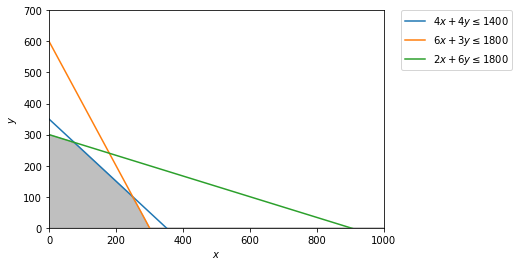

In [17]:
# Plot graph

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines
# x > 0
x = np.linspace(start=0, stop=1000)
# 4x + 4y <= 1400
y1 = (1400-4*x)/4
# 6x + 3y <= 1800
y2 = (1800-6*x)/3
# 2x + 6y <= 1800
y3 = (1800-2*x)/6

# Make plot
plt.plot(x, y1, label=r'$4x+4y\leq1400$')
plt.plot(x, y2, label=r'$6x+3y\leq1800$')
plt.plot(x, y3, label=r'$2x+6y\leq1800$')
plt.xlim((0, 1000))
plt.ylim((0, 700))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y4 = np.minimum(y1,y2)
y5 = np.minimum(y3,y4)
plt.fill_between(x, y5, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [18]:
# Install package

# Install package "pulp"
import sys
!pip install pulp

In [19]:
# Find the optimal solution

# import the library pulp as p
import pulp as p

# Create a LP Maximization problem
Lp_prob = p.LpProblem('Problem', p.LpMaximize)

# Create problem Variables
x = p.LpVariable("x", lowBound = 0) # Create a variable x >= 0
y = p.LpVariable("y", lowBound = 0) # Create a variable y >= 0

# Objective Function
Lp_prob += 12*x + 8*y

# Constraints:
Lp_prob += 4*x + 4*y <= 1400
Lp_prob += 6*x + 3*y <= 1800
Lp_prob += 2*x + 6*y <= 1800

# Display the problem
print(Lp_prob)

status = Lp_prob.solve() # Solver
print(p.LpStatus[status]) # The solution status

# Printing the final solution
print(p.value(x), p.value(y), p.value(Lp_prob.objective))

Problem:
MAXIMIZE
12*x + 8*y + 0
SUBJECT TO
_C1: 4 x + 4 y <= 1400

_C2: 6 x + 3 y <= 1800

_C3: 2 x + 6 y <= 1800

VARIABLES
x Continuous
y Continuous

Optimal
250.0 100.0 3800.0
